,beta,alpha
1,1.986779,0.716272
3,2.714809,1.028903
5,3.787364,0.552584
6,5.497787,0.017520
7,2.216568,0.885419
...,...,...
6538,2.224883,0.953885
6539,5.507548,0.734534
6540,5.627467,1.309222
6541,1.850049,0.717247


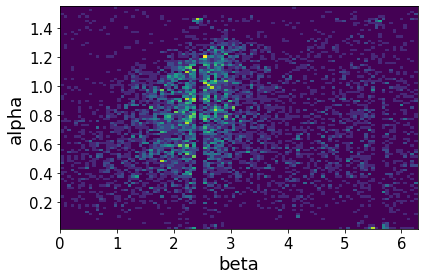

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

pi = np.pi

display(data)

data   = pd.read_hdf("MeasuredMuonsFromData.h5") # Read in data

# Add 220deg to beta
data["beta"] = data["beta"] + pi*(220)/180 

# Account for rotational symmetry
data.loc[data.beta>pi*2, "beta"] = data["beta"] - pi*2
data.loc[data.beta<0, "beta"] = data["beta"] + pi*2

# Reverse direction of beta to opposite direction
data["beta"] = -1*(data["beta"] - pi*2)

hist_data= plt.hist2d(data["beta"], data["alpha"], bins=100) 
plt.xlabel("beta", fontsize=18)
plt.ylabel("alpha", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 
plt.tight_layout()
plt.show()


,beta,alpha,SimWeightAvg
12,0.279253,0.805147,0.577627
17,3.665191,1.171139,0.021474
73,1.763946,0.266530,0.163287
107,5.986775,0.894528,0.651909
130,4.332619,0.093923,0.212168
...,...,...,...
139435,2.967060,0.442225,0.169161
139442,3.892084,0.905548,0.055124
139449,4.282705,0.286626,0.168408
139461,1.825297,0.395478,0.158603


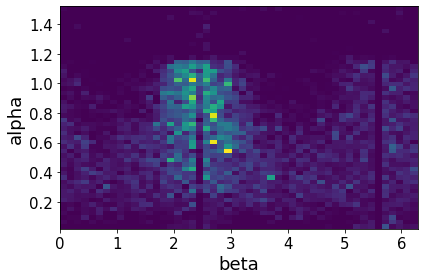

In [140]:
data   = pd.read_hdf("MCFluxOutputs.h5")

display(data)

data["beta"] = data["beta"] + pi*(220)/180
data.loc[data.beta>pi*2, "beta"] = data["beta"] - pi*2
data.loc[data.beta<0, "beta"] = data["beta"] + pi*2
data["beta"] = -1*(data["beta"] - pi*2)

hist_data= plt.hist2d(data["beta"], data["alpha"],weights=data["SimWeightAvg"], bins=50) 
plt.xlabel("beta", fontsize=18)
plt.ylabel("alpha", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 
plt.tight_layout()
plt.show()


In [131]:
# print(hist_data[0])
# print(hist_data[1]) # rows
# print(hist_data[2]) # columns

rows = []
columns = []

# Get the Bin Centers to loop over
for indx in range(0, len(hist_data[1])-1):
    rows.append( (hist_data[1][indx+1] - hist_data[1][indx])/2.0 + hist_data[1][indx])
    # print(rows[indx])

for indx in range(0, len(hist_data[2])-1):
    columns.append( (hist_data[2][indx+1] - hist_data[2][indx])/2.0 + hist_data[2][indx])
    # print(columns[indx])

# Loop over the histogram bins and create three arrays 
# print(len(hist_data[0][:]), len(rows), len(columns))


intensity = []
beta      = []
alpha     = []

for y in range(0, len(hist_data[0])):
    for x in range(0, len(hist_data[0][y])):
        # print(hist_data[0][y][x], rows[y], columns[x])
        intensity.append(hist_data[0][y][x])
        beta.append(rows[y])
        alpha.append(columns[x])
    
    # print(" ")

dict_ = {'Intenisty':intensity, 'beta': beta, 'alpha': alpha}

dataframe = pd.DataFrame(dict_)
display(dataframe)

,Intenisty,beta,alpha
0,0.0,0.078536,0.036610
1,0.0,0.078536,0.074877
2,0.0,0.078536,0.113143
3,0.0,0.078536,0.151410
4,2.0,0.078536,0.189676
...,...,...,...
1595,0.0,6.204330,1.375936
1596,0.0,6.204330,1.414202
1597,3.0,6.204330,1.452469
1598,4.0,6.204330,1.490735


In [132]:
# Write the data from hdf5 format to csv for reading into nexus
filepath = Path('MeasuredMuonsFromData.csv')  
dataframe.to_csv(filepath, index = False, header = False)  